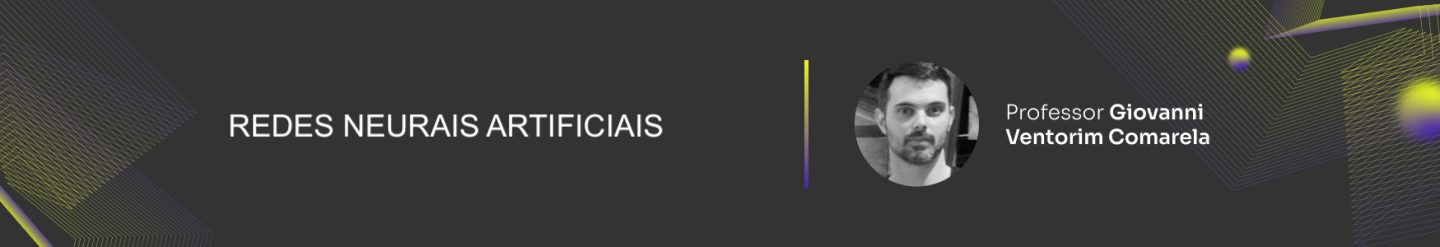

# Laboratório 2

Neste laboratório, vamos aplicar um pouco da teoria e prática que vimos ao longo das três primeiras semanas da disciplina.

Para isso, novamente, vamos utilizar o conjunto de dados [``Fashion MNIST``](https://keras.io/api/datasets/fashion_mnist/).

O conjunto de dados contém imagens de 10 categorias de peças de vestuário.

São 70 mil imagens de tamanho 28x28 (píxeis) em escala de cinza, distribuídas nas 10 categorias.

## Obtenção dos dados

Para obter o conjunto de dados, podemos utilizar a própria biblioteca `Keras`.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras.datasets import fashion_mnist
sns.set()

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Observe que o conjunto de dados já vem dividido em porções de treinamento e teste. Assim, essa é uma etapa com a qual você não vai precisar se preocupar. A seguir, o tamanho de cada porção do conjunto de dados.

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Veja que cada elemento do conjunto de dados é uma matriz com 28 linhas e 28 colunas. Cada matriz representa uma imagem, em escala de cinza, de uma peça de vestuário. São 10 tipos de peças no conjunto de dados, i.e., são 10 classes.

As figuras abaixo apresentam as classes e os tipos de peças de vestuário contidas no conjunto de dados.

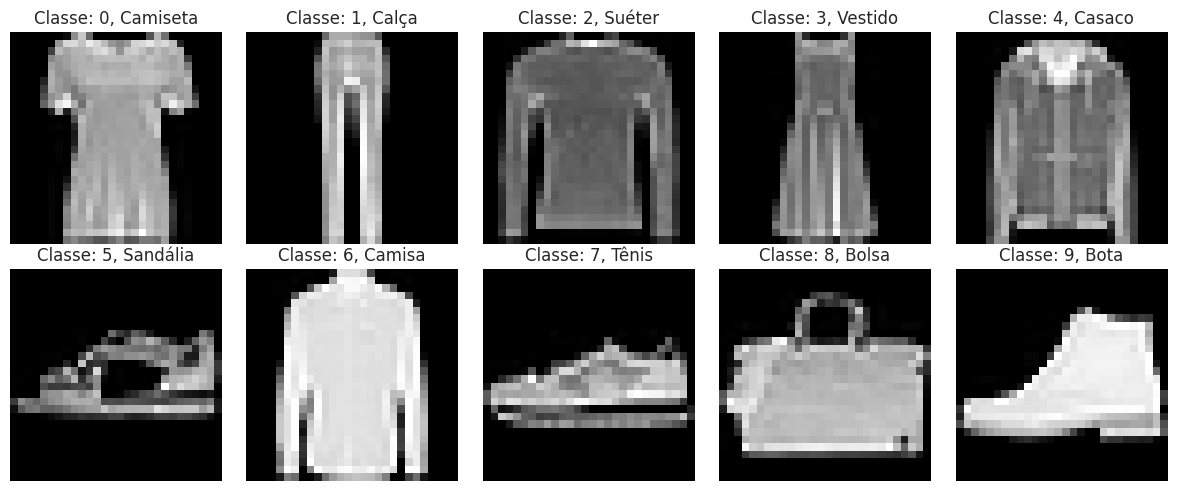

In [4]:
#@title
labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = X_train[y_train == i][3]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Classe: %d, %s" % (i, labels[i]))
    plt.axis('off')
plt.tight_layout();

Como o conjunto de dados é relativamente grande, iremos trabalhar apenas com uma porção do conjunto de treinamento, para que o treinamento dos modelos não tome muito tempo. O Código abaixo já faz essa amostra para vocês.

In [5]:
# não modifique nada aqui

import random

sampleSize = 20000 # um terço dos dados originais
random.seed(42)
sampleIndex = random.sample(list(np.arange(0, X_train.shape[0])), sampleSize)

X_train = X_train[sampleIndex]
y_train = y_train[sampleIndex]

**ATENÇÃO:** você não deve remover ou adicionar células no restante deste *notebook*.

Sempre escreva suas respostas nas células indicadas!

## Parte I: Preparação dos Dados [10 pontos - Todos os itens têm o mesmo valor]

### Item 1.1

Cada imagem dos conjuntos de treino e teste é uma matriz 28x28. Como visto na disciplina, MLPs precisam que a entrada seja um vetor, não uma matriz.

Transforme os elementos dos conjuntos de treino e teste em objetos de tamanho 784 (28 * 28 = 784).

**Dica:** use a função [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [6]:
# Escreva sua resposta aqui
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [7]:
print(X_train.shape)
print(X_test.shape)

(20000, 784)
(10000, 784)


Antes de continuar, é importante que saída da célula de código acima seja como mostrado na figura abaixo.

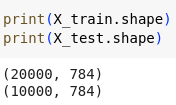

Após isso, é importante converter os dados para ponto flutuante e normalizar os valores. O código abaixo já faz isso para você.

In [8]:
# não modifique aqui

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

### Item 1.2

Separe 30% do conjunto de treinamento para ser utilizado como conjunto de validação. Ou seja, 70% dos dados de treinamento serão utilizados para treinar o modelo e os demais 30% serão utilizados para acompanhar o treinamento.

In [9]:
# Escreva sua resposta aqui.
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)

print("Treino X:", X_train_final.shape)
print("Treino y:", y_train_final.shape)
print("Validação X:", X_val.shape)
print("Validação y:", y_val.shape)

Treino X: (14000, 784)
Treino y: (14000,)
Validação X: (6000, 784)
Validação y: (6000,)


### Item 1.3

Codifique os rótulos do conjunto de treinamento e do conjunto de validação utilizando a codificação *one-hot*.

**Dica:** use a classe [CategoryEncoding](https://keras.io/api/layers/preprocessing_layers/categorical/category_encoding/) do `Keras`.

In [10]:
# Escreva sua resposta aqui
from tensorflow.keras.layers import CategoryEncoding

num_classes = 10
one_hot_encoder = CategoryEncoding(num_tokens=num_classes, output_mode="one_hot")

y_train_final_enconde = one_hot_encoder(y_train_final)
y_val_enconde = one_hot_encoder(y_val)
y_test_enconde = one_hot_encoder(y_test)


print(y_train_final_enconde.shape)
print(y_val_enconde.shape)
print(y_test_enconde.shape)

(14000, 10)
(6000, 10)
(10000, 10)


## Parte II: Modelo base [20 pontos - Todos os itens têm o mesmo valor]

### Item 2.1

Defina um modelo, em Keras, com duas camadas ocultas, cada uma com 64 unidades. Como função de ativação na camada de saída, utilize a softmax. Como função de ativação nas camadas ocultas, utilize a ReLU.

In [11]:
# Escreva sua resposta aqui
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),  # Primeira camada oculta
    Dense(64, activation='relu'),                      # Segunda camada oculta
    Dense(num_classes, activation='softmax')           # Camada de saída
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

### Item 2.2

Utilize o método [compile](https://keras.io/api/models/model_training_apis/) para preparar o modelo e definir a função de perda como sendo a Entropia Cruzada Categórica (*Categorical Cross-Entropy*). Além disso, você deve definir o $F1$-*score* como métrica a ser computada ao longo das épocas de treinamento.

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import F1Score

num_classes = 10


model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=[F1Score(average='macro', name='f1_score')]
)
print("Modelo compilado com sucesso!")
model.summary()

Modelo compilado com sucesso!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

### Item 2.3

Treine o modelo utilizando o método [fit](https://keras.io/api/models/model_training_apis/). Além dos dados de treinamento, informe:
- `epochs = 500`;
- `verbose` = 2 (para você poder acompanhar o andamento do processo de treinamento);
- `batch_size` = 128;
- A porção dos dados utilizada para validação, por meio do parâmetro `validation_data`.

Lembre de salvar a saída do método em uma variável, para uso no próximo Item.

In [13]:
# Escreva sua resposta aqui
history = model.fit(
    X_train_final,
    y_train_final_enconde,
    epochs=500,
    batch_size=128,
    verbose=2,
    validation_data=(X_val, y_val_enconde)
)

Epoch 1/500
110/110 - 5s - 44ms/step - f1_score: 0.3326 - loss: 1.9032 - val_f1_score: 0.5144 - val_loss: 1.4813
Epoch 2/500
110/110 - 1s - 6ms/step - f1_score: 0.6037 - loss: 1.2449 - val_f1_score: 0.6370 - val_loss: 1.0649
Epoch 3/500
110/110 - 1s - 7ms/step - f1_score: 0.6725 - loss: 0.9645 - val_f1_score: 0.6746 - val_loss: 0.8847
Epoch 4/500
110/110 - 1s - 5ms/step - f1_score: 0.7090 - loss: 0.8357 - val_f1_score: 0.6783 - val_loss: 0.8071
Epoch 5/500
110/110 - 0s - 5ms/step - f1_score: 0.7349 - loss: 0.7649 - val_f1_score: 0.7367 - val_loss: 0.7337
Epoch 6/500
110/110 - 0s - 4ms/step - f1_score: 0.7554 - loss: 0.7156 - val_f1_score: 0.7566 - val_loss: 0.6961
Epoch 7/500
110/110 - 1s - 6ms/step - f1_score: 0.7654 - loss: 0.6801 - val_f1_score: 0.7637 - val_loss: 0.6645
Epoch 8/500
110/110 - 1s - 6ms/step - f1_score: 0.7806 - loss: 0.6492 - val_f1_score: 0.7279 - val_loss: 0.6852
Epoch 9/500
110/110 - 1s - 5ms/step - f1_score: 0.7897 - loss: 0.6270 - val_f1_score: 0.7867 - val_loss

### Item 2.4

Utilizando a saída do método `fit`, faça dois gráficos da seguinte maneira:
- O primeiro deve conter a evolução da função de perda/custo ao longo do treinamento (i.e., épocas) para os conjuntos de validação e treino.
- O segundo deve conter a evolução da métrica $F1$-*score* ao longo do treinamento (i.e., épocas) para os conjuntos de validação e treino.

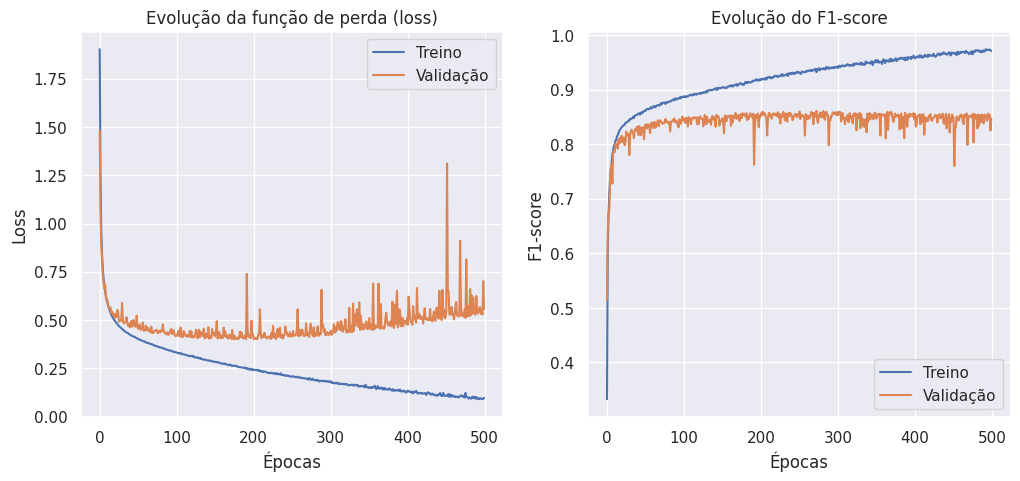

In [14]:
# Escreva sua resposta aqui
import matplotlib.pyplot as plt

# 1. Gráfico da função de perda (loss)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da função de perda (loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# 2. Gráfico do F1-score
plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='Treino')
plt.plot(history.history['val_f1_score'], label='Validação')
plt.title('Evolução do F1-score')
plt.xlabel('Épocas')
plt.ylabel('F1-score')
plt.legend()

plt.show()


### Item 2.5

Utilize o modelo treinado para prever os rótulos dos elementos do conjunto de teste. Além disso, utilize o método `classification_report`, da biblioteca `scikit-learn` para avaliar a qualidade do modelo no conjunto de teste.

In [15]:
# Escreva sua resposta aqui
from sklearn.metrics import classification_report
import numpy as np

labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]


# 1. Prever probabilidades para o conjunto de teste
y_pred_prob = model.predict(X_test)

# 2. Converter probabilidades para classe com maior probabilidade
y_pred = np.argmax(y_pred_prob, axis=1)

y_test_labels = y_test

# 3. Imprimir o classification_report
print(classification_report(y_test_labels, y_pred, target_names=labels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    Camiseta       0.84      0.69      0.76      1000
       Calça       0.97      0.95      0.96      1000
      Suéter       0.80      0.69      0.74      1000
     Vestido       0.87      0.83      0.85      1000
      Casaco       0.74      0.78      0.76      1000
    Sandália       0.93      0.93      0.93      1000
      Camisa       0.57      0.75      0.65      1000
       Tênis       0.91      0.92      0.92      1000
       Bolsa       0.95      0.94      0.94      1000
        Bota       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



## Parte III: Adicionando Early Stopping [20 pontos - Todas as partes têm o mesmo valor]

Repita o experimento da Parte II, com um modelo seguindo a mesma arquitetura. Você deve executar os mesmos passos. No entanto, além disso, adicione o mecanismo de [*Early Stopping*](https://keras.io/api/callbacks/early_stopping/). Na definição desse mecanismo, use:
- `val_loss` como métrica a ser monitorada;
- `start_from_epoch` = 30;
- `restore_best_weights` = `True`; e
- `patience` = 50.

In [16]:
# escreva sua resposta aqui
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',        # métrica para monitorar
    patience=50,               # espera 50 épocas antes de parar
    restore_best_weights=True, # volta ao melhor peso encontrado
    verbose=1,
    start_from_epoch=30        # só começa a monitorar depois da época 30
)

In [17]:
# escreva sua resposta aqui
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# escreva sua resposta aqui
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=[F1Score(average='macro', name='f1_score')]
)

In [19]:
# escreva sua resposta aqui
history = model.fit(
    X_train_final,
    y_train_final_enconde,
    epochs=500,
    batch_size=128,
    verbose=2,
    validation_data=(X_val, y_val_enconde),
    callbacks=[early_stopping]
)

Epoch 1/500
110/110 - 3s - 24ms/step - f1_score: 0.3631 - loss: 1.9701 - val_f1_score: 0.5282 - val_loss: 1.5624
Epoch 2/500
110/110 - 1s - 7ms/step - f1_score: 0.5731 - loss: 1.2924 - val_f1_score: 0.5919 - val_loss: 1.0919
Epoch 3/500
110/110 - 1s - 6ms/step - f1_score: 0.6265 - loss: 0.9865 - val_f1_score: 0.6456 - val_loss: 0.9048
Epoch 4/500
110/110 - 1s - 5ms/step - f1_score: 0.6814 - loss: 0.8538 - val_f1_score: 0.6872 - val_loss: 0.8124
Epoch 5/500
110/110 - 0s - 4ms/step - f1_score: 0.7208 - loss: 0.7786 - val_f1_score: 0.7249 - val_loss: 0.7529
Epoch 6/500
110/110 - 0s - 4ms/step - f1_score: 0.7474 - loss: 0.7256 - val_f1_score: 0.7428 - val_loss: 0.7273
Epoch 7/500
110/110 - 1s - 6ms/step - f1_score: 0.7656 - loss: 0.6865 - val_f1_score: 0.7571 - val_loss: 0.6791
Epoch 8/500
110/110 - 0s - 4ms/step - f1_score: 0.7771 - loss: 0.6540 - val_f1_score: 0.7741 - val_loss: 0.6626
Epoch 9/500
110/110 - 1s - 6ms/step - f1_score: 0.7870 - loss: 0.6289 - val_f1_score: 0.7700 - val_loss

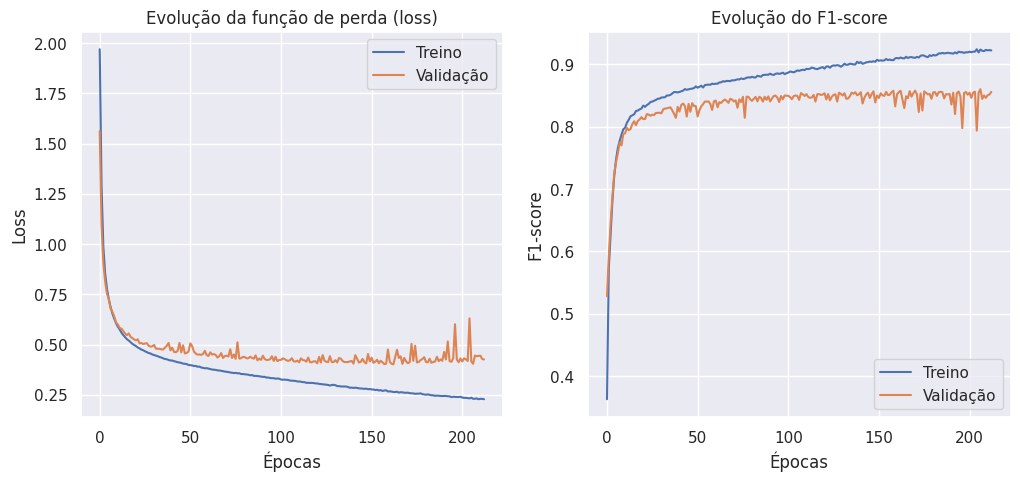

In [20]:
# Escreva sua resposta aqui
import matplotlib.pyplot as plt

# 1. Gráfico da função de perda (loss)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da função de perda (loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# 2. Gráfico do F1-score
plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='Treino')
plt.plot(history.history['val_f1_score'], label='Validação')
plt.title('Evolução do F1-score')
plt.xlabel('Épocas')
plt.ylabel('F1-score')
plt.legend()

plt.show()


In [21]:
# Escreva sua resposta aqui
from sklearn.metrics import classification_report
import numpy as np

labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

y_pred_prob = model.predict(X_test)


y_pred = np.argmax(y_pred_prob, axis=1)

y_true = y_test

print(classification_report(y_true, y_pred, target_names=labels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    Camiseta       0.83      0.77      0.80      1000
       Calça       0.98      0.96      0.97      1000
      Suéter       0.73      0.77      0.75      1000
     Vestido       0.80      0.90      0.85      1000
      Casaco       0.79      0.73      0.76      1000
    Sandália       0.94      0.94      0.94      1000
      Camisa       0.64      0.62      0.63      1000
       Tênis       0.92      0.91      0.92      1000
       Bolsa       0.94      0.95      0.95      1000
        Bota       0.93      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Parte IV: Adicionando Dropout [20 pontos - Todas as partes têm o mesmo valor]

Repita o experimento da Parte III, com um modelo seguindo a mesma arquitetura e com o mesmo mecanismo de *Early Stopping*. No entanto, além disso, adicione uma camada de [*Dropout*](https://keras.io/2/api/layers/regularization_layers/dropout/) após cada camada oculta. Use $p = 0.2$ (taxa de unidades a serem "desativadas" de 20%) para cada camada de *Dropout*.

In [22]:
# escreva sua resposta aqui
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=50,
    start_from_epoch=30,
    restore_best_weights=True
)

In [23]:
# escreva sua resposta aqui
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

num_classes = 10

# Definição do modelo com Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dropout(0.2),  # Dropout após a primeira camada oculta
    Dense(64, activation='relu'),
    Dropout(0.2),  # Dropout após a segunda camada oculta
    Dense(num_classes, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# escreva sua resposta aqui
# uso do método compile
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=[F1Score(average='macro', name='f1_score')]
)

In [25]:
# escreva sua resposta aqui
# uso do método fit. Lembre de usar o mecanismo de early stopping.
history = model.fit(
    X_train_final,
    y_train_final_enconde,
    epochs=500,
    batch_size=128,
    verbose=2,
    validation_data=(X_val, y_val_enconde),
    callbacks=[early_stopping]
)


Epoch 1/500
110/110 - 4s - 36ms/step - f1_score: 0.2968 - loss: 2.0104 - val_f1_score: 0.5782 - val_loss: 1.5989
Epoch 2/500
110/110 - 2s - 20ms/step - f1_score: 0.4775 - loss: 1.5046 - val_f1_score: 0.6071 - val_loss: 1.1684
Epoch 3/500
110/110 - 0s - 4ms/step - f1_score: 0.5395 - loss: 1.2452 - val_f1_score: 0.6252 - val_loss: 0.9909
Epoch 4/500
110/110 - 1s - 5ms/step - f1_score: 0.5807 - loss: 1.1053 - val_f1_score: 0.6589 - val_loss: 0.8990
Epoch 5/500
110/110 - 0s - 4ms/step - f1_score: 0.6111 - loss: 1.0365 - val_f1_score: 0.6664 - val_loss: 0.8452
Epoch 6/500
110/110 - 1s - 5ms/step - f1_score: 0.6331 - loss: 0.9669 - val_f1_score: 0.6822 - val_loss: 0.8033
Epoch 7/500
110/110 - 1s - 6ms/step - f1_score: 0.6513 - loss: 0.9254 - val_f1_score: 0.7141 - val_loss: 0.7644
Epoch 8/500
110/110 - 1s - 7ms/step - f1_score: 0.6729 - loss: 0.8889 - val_f1_score: 0.7238 - val_loss: 0.7392
Epoch 9/500
110/110 - 1s - 9ms/step - f1_score: 0.6829 - loss: 0.8604 - val_f1_score: 0.7338 - val_los

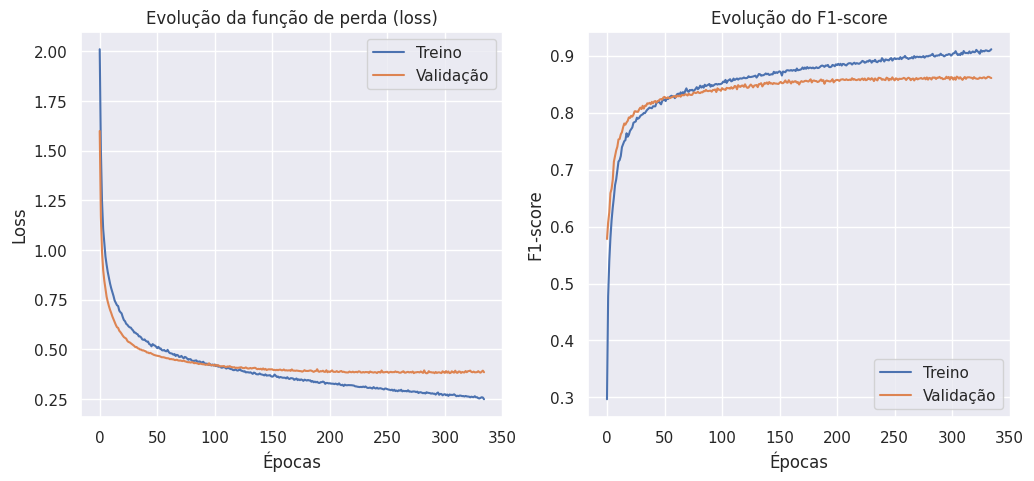

In [26]:
# escreva sua resposta aqui
# gráfico da função de perda e f1-score para os conjuntos de validação e treinamento

import matplotlib.pyplot as plt

# 1. Gráfico da função de perda (loss)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da função de perda (loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# 2. Gráfico do F1-score
plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='Treino')
plt.plot(history.history['val_f1_score'], label='Validação')
plt.title('Evolução do F1-score')
plt.xlabel('Épocas')
plt.ylabel('F1-score')
plt.legend()

plt.show()


In [27]:
# Escreva sua resposta aqui
# predição e avaliação no conjunto de teste com classification_report
from sklearn.metrics import classification_report
import numpy as np

labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

y_pred_prob = model.predict(X_test)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = y_test

print(classification_report(y_true, y_pred, target_names=labels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    Camiseta       0.82      0.82      0.82      1000
       Calça       0.99      0.96      0.97      1000
      Suéter       0.74      0.79      0.76      1000
     Vestido       0.87      0.86      0.86      1000
      Casaco       0.75      0.79      0.77      1000
    Sandália       0.94      0.93      0.93      1000
      Camisa       0.69      0.61      0.65      1000
       Tênis       0.91      0.93      0.92      1000
       Bolsa       0.95      0.97      0.96      1000
        Bota       0.95      0.93      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Parte V: Testando um otimizador diferente [20 pontos - Todas as partes têm o mesmo valor]

Repita o experimento da Parte IV, com um modelo seguindo a mesma arquitetura, com o mesmo mecanismo de *Early Stopping* e *Dropout*. No entanto, além disso, utilize o otimizador [Adam](https://keras.io/api/optimizers/adam/) (Exemplo [aqui](https://keras.io/api/optimizers/)) para realizar o treinamento do modelo.

In [28]:
# escreva sua resposta aqui
# definição do mecanismo de early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=50,
    start_from_epoch=30,
    restore_best_weights=True
)

In [29]:
# escreva sua resposta aqui
# definição do modelo. Lembre de adicionar as camadas de Dropout aqui
num_classes = 10

model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# escreva sua resposta aqui
# uso do método compile. Lembre de informar o otimizador Adam aqui
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[F1Score(average='macro', name='f1_score')]
)

In [31]:
# escreva sua resposta aqui
# uso do método fit. Lembre de usar o mecanismo de early stopping.
history = model.fit(
    X_train_final,
    y_train_final_enconde,
    epochs=500,
    batch_size=128,
    verbose=2,
    validation_data=(X_val, y_val_enconde),
    callbacks=[early_stopping]
)

Epoch 1/500
110/110 - 6s - 50ms/step - f1_score: 0.5857 - loss: 1.1564 - val_f1_score: 0.7644 - val_loss: 0.6510
Epoch 2/500
110/110 - 1s - 6ms/step - f1_score: 0.7590 - loss: 0.6889 - val_f1_score: 0.8033 - val_loss: 0.5416
Epoch 3/500
110/110 - 1s - 10ms/step - f1_score: 0.7967 - loss: 0.5870 - val_f1_score: 0.8209 - val_loss: 0.4816
Epoch 4/500
110/110 - 0s - 4ms/step - f1_score: 0.8141 - loss: 0.5269 - val_f1_score: 0.8282 - val_loss: 0.4561
Epoch 5/500
110/110 - 0s - 4ms/step - f1_score: 0.8297 - loss: 0.4900 - val_f1_score: 0.8315 - val_loss: 0.4420
Epoch 6/500
110/110 - 1s - 6ms/step - f1_score: 0.8428 - loss: 0.4585 - val_f1_score: 0.8400 - val_loss: 0.4249
Epoch 7/500
110/110 - 1s - 5ms/step - f1_score: 0.8473 - loss: 0.4346 - val_f1_score: 0.8435 - val_loss: 0.4137
Epoch 8/500
110/110 - 1s - 6ms/step - f1_score: 0.8470 - loss: 0.4268 - val_f1_score: 0.8358 - val_loss: 0.4248
Epoch 9/500
110/110 - 1s - 6ms/step - f1_score: 0.8533 - loss: 0.4037 - val_f1_score: 0.8453 - val_los

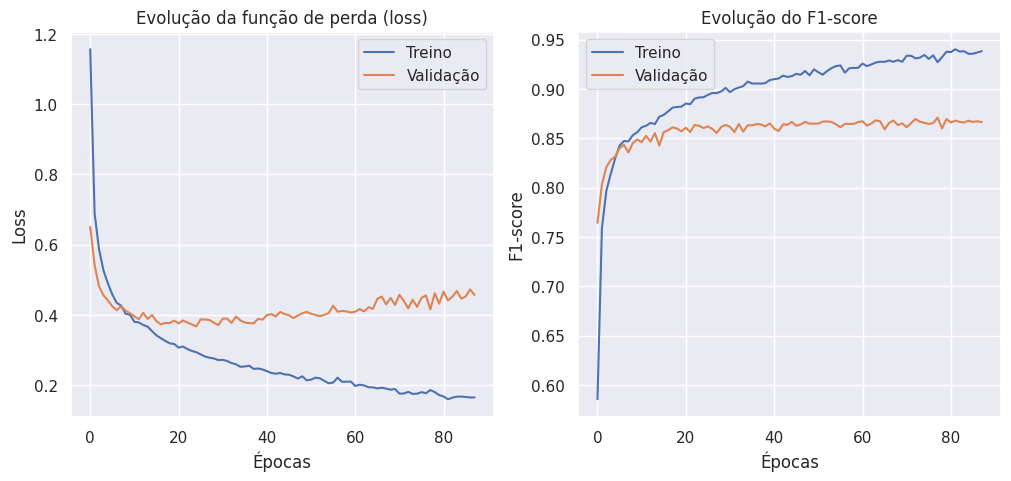

In [32]:
# escreva sua resposta aqui
# gráfico da função de perda e f1-score para os conjuntos de validação e treinamento
import matplotlib.pyplot as plt

# 'history' é o objeto retornado por model.fit()

# 1. Gráfico da função de perda (loss)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da função de perda (loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# 2. Gráfico do F1-score
plt.subplot(1, 2, 2)
plt.plot(history.history['f1_score'], label='Treino')
plt.plot(history.history['val_f1_score'], label='Validação')
plt.title('Evolução do F1-score')
plt.xlabel('Épocas')
plt.ylabel('F1-score')
plt.legend()

plt.show()

In [33]:
# Escreva sua resposta aqui
# predição e avaliação no conjunto de teste com classification_report
from sklearn.metrics import classification_report
import numpy as np

labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

y_pred_prob = model.predict(X_test)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = y_test

print(classification_report(y_true, y_pred, target_names=labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

    Camiseta       0.83      0.79      0.81      1000
       Calça       0.98      0.95      0.97      1000
      Suéter       0.82      0.68      0.74      1000
     Vestido       0.87      0.87      0.87      1000
      Casaco       0.70      0.86      0.77      1000
    Sandália       0.97      0.93      0.95      1000
      Camisa       0.66      0.65      0.65      1000
       Tênis       0.92      0.94      0.93      1000
       Bolsa       0.95      0.97      0.96      1000
        Bota       0.94      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Parte VI: Interpretação [10 pontos - Todos os itens têm o mesmo valor]

### Item 6.1

Na Parte II, você diria que o modelo sofreu de *overfitting*? Justifique sua resposta.

**Escreva sua resposta aqui:** Sim, o conjunto de treino ficou com loss quase 0 e f1-score quase 1, mas isso não se refletiu nos dados de validação
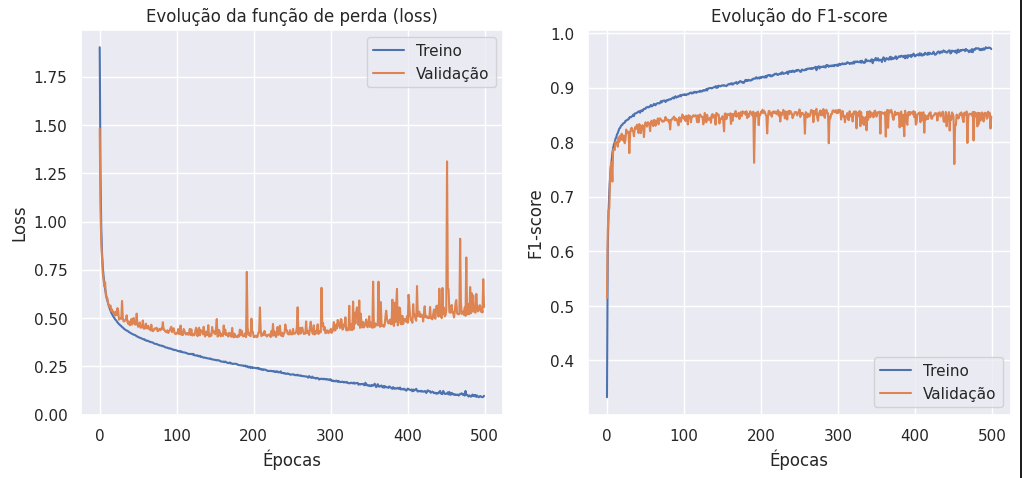

### Item 6.2

O modelo resultante da Parte III é melhor do que o obtido na Parte II?

**Escreva sua resposta aqui:** Sim, o mecanismo de early stopping parou o treinamento antes do overfitting acontecer, selecionando os melhores pesos na janela de treinamento do early stopping  
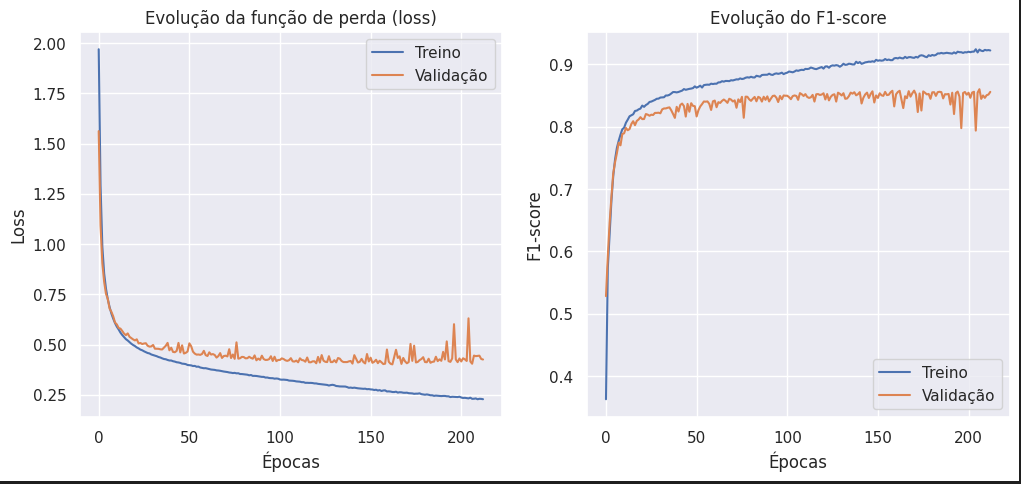

### Item 6.3

Na Parte IV, utilizar *Dropout* trouxe melhoria na qualidade dos resultados?

**Escreva sua resposta aqui:** Sim, o dropout melhorou os resultados mostrados no conjunto de validação, deixando eles mais próximos do resultado do conjunto de treino, mostrando um modelo mais estável e com uma diminuição do "overfitting"

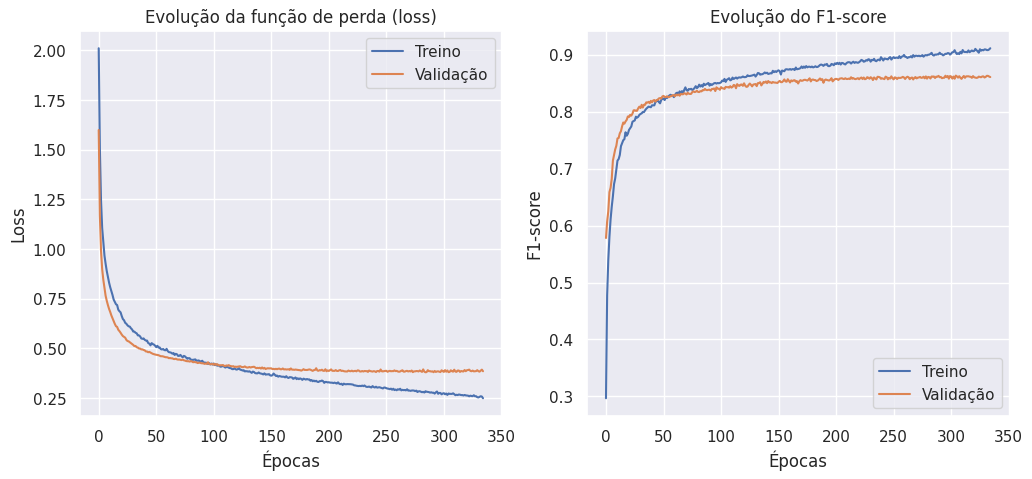

### Item 6.4

Na Parte V, utilizar um otimizador diferente do SGD trouxe melhoria na qualidade dos resultados?

**Escreva sua resposta aqui:** Não houve muita melhoria nas métricas de classificação, mas o modelo convergiu muito mais rápido usando adam

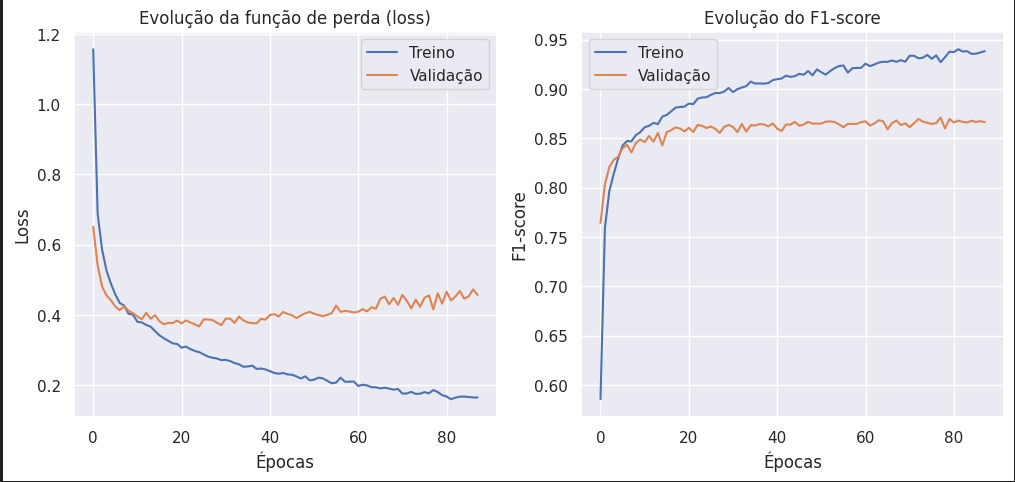